# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
import plotly.express as px
import pandas as pd
import warnings

In [225]:
vehicles = pd.read_csv("data/vehicles.csv")

In [226]:
from sklearn.preprocessing import OrdinalEncoder

In [227]:
from sklearn.feature_selection import RFE

In [228]:
vehicles.size

7683840

In [233]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [235]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [237]:
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [239]:
vehicles["title_status"].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [241]:
vehicles["transmission"].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [243]:
vehicles["condition"].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [245]:
vehicles["manufacturer"].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [247]:
vehicles["cylinders"].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [249]:
vehicles["type"].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [251]:
vehicles["size"].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [253]:
vehicles["model"].unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [255]:
vehicles["drive"].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [257]:
vehicles["fuel"].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [259]:
vehicles["year"].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [262]:
vals = vehicles.groupby(['size'])[["price"]].mean()

In [264]:
vals = vals.reset_index()

In [266]:
vals

,size,price
0,compact,17510.309430
1,full-size,99169.478642
2,mid-size,120018.136095
3,sub-compact,12266.978397


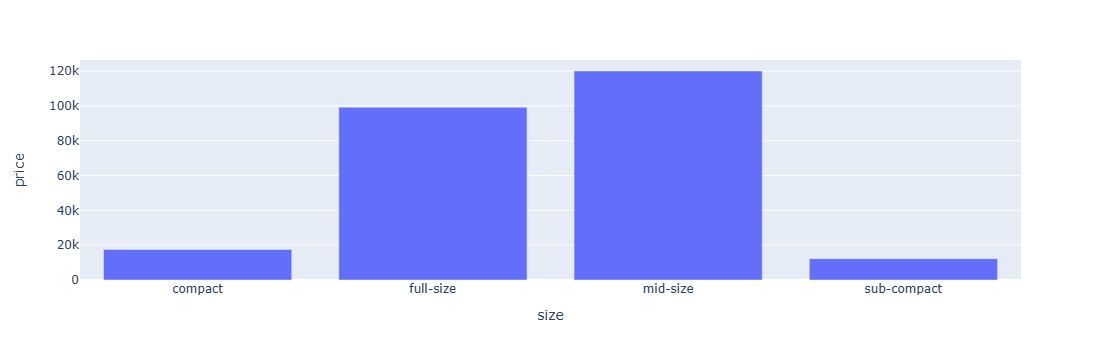

In [268]:
fig = px.bar(vals, x='size', y='price')
fig.show()

In [270]:
vals = vehicles.groupby(['condition'])[["price"]].mean()

In [272]:
vals = vals.reset_index()

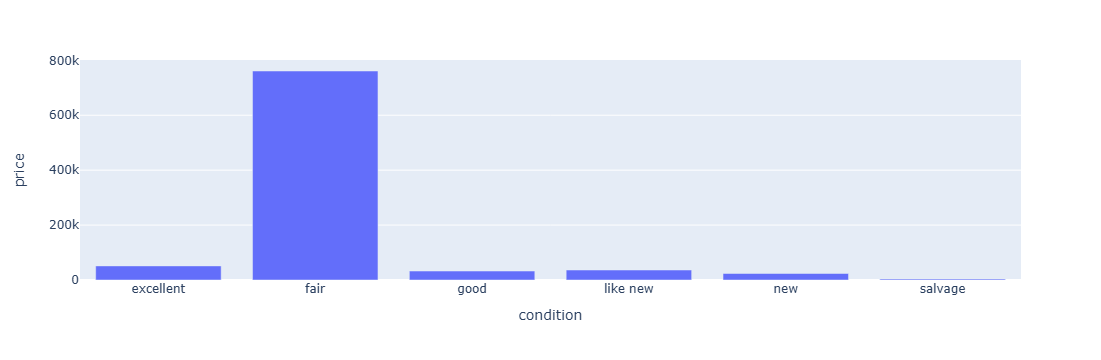

In [274]:
fig = px.bar(vals, x='condition', y='price')
fig.show()

In [276]:
vals = vehicles.groupby(['cylinders'])[["price"]].mean()

In [278]:
vals = vals.reset_index()

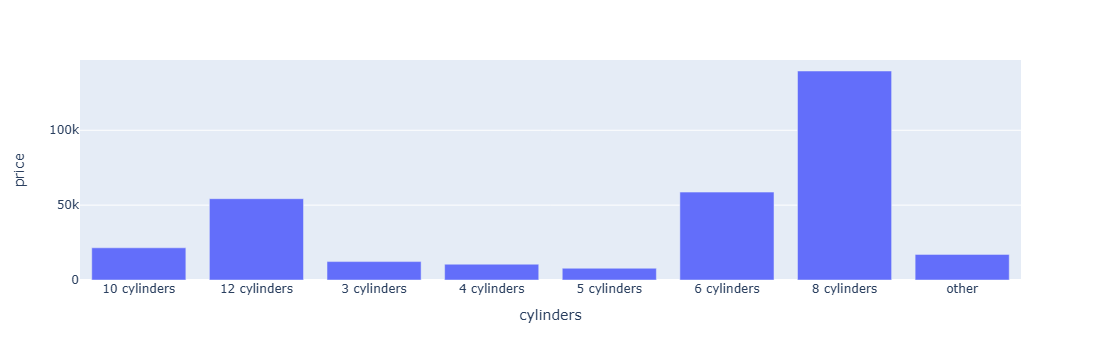

In [280]:
fig = px.bar(vals, x='cylinders', y='price')
fig.show()

In [282]:
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [286]:
vehicles = vehicles.dropna()

In [288]:
vehicles = vehicles[vehicles['price'] > 500]

In [290]:
vehicles = vehicles.drop(columns=["title_status", "manufacturer","region","state","paint_color","VIN","drive","model"], axis=1)

In [292]:
vehicles.head()

,id,price,year,condition,cylinders,fuel,odometer,transmission,size,type
215,7316482063,4000,2002.0,excellent,4 cylinders,gas,155000.0,automatic,compact,sedan
219,7316429417,2500,1995.0,fair,6 cylinders,gas,110661.0,automatic,mid-size,sedan
268,7315946365,9000,2008.0,excellent,4 cylinders,gas,56700.0,automatic,compact,convertible
337,7315354216,8950,2011.0,excellent,6 cylinders,gas,164000.0,automatic,full-size,truck
338,7315349921,4000,1972.0,fair,6 cylinders,gas,88100.0,automatic,full-size,coupe


In [294]:
y_train = vehicles["price"]

In [296]:
X_train = pd.DataFrame(vehicles[["year", "condition","cylinders","fuel", "odometer","transmission","size","type"]]) 

In [298]:
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['transmission','fuel', 'type']), (OrdinalEncoder(categories = [['salvage', 'fair','good', 'excellent', 'like new', 'new']]), ['condition']), (OrdinalEncoder(categories = [['other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders',  '12 cylinders']]), ['cylinders']),\
                                          (OrdinalEncoder(categories = [['sub-compact', 'compact', 'mid-size', 'full-size']]), ['size']), remainder='passthrough')

In [300]:
vals = vehicles.groupby(['condition'])[["price"]].mean()

In [302]:
vals = vals.reset_index()

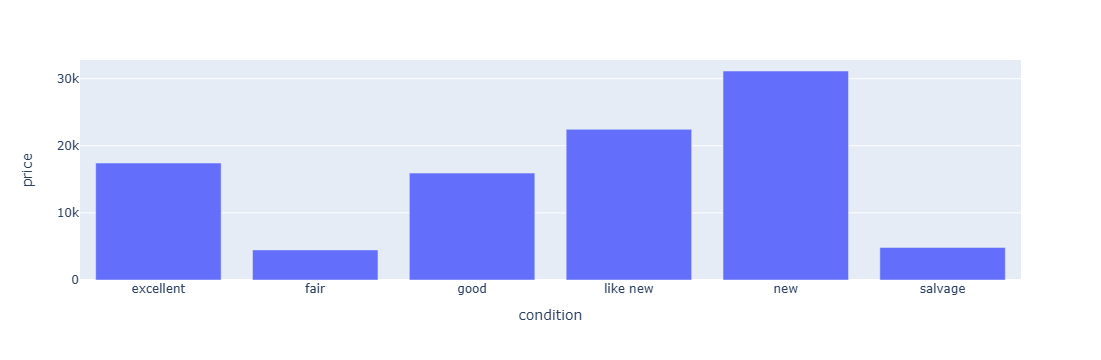

In [304]:
fig = px.bar(vals, x='condition', y='price')
fig.show()

In [306]:
vals = vehicles.groupby(['size'])[["price"]].mean()

In [308]:
vals = vals.reset_index()

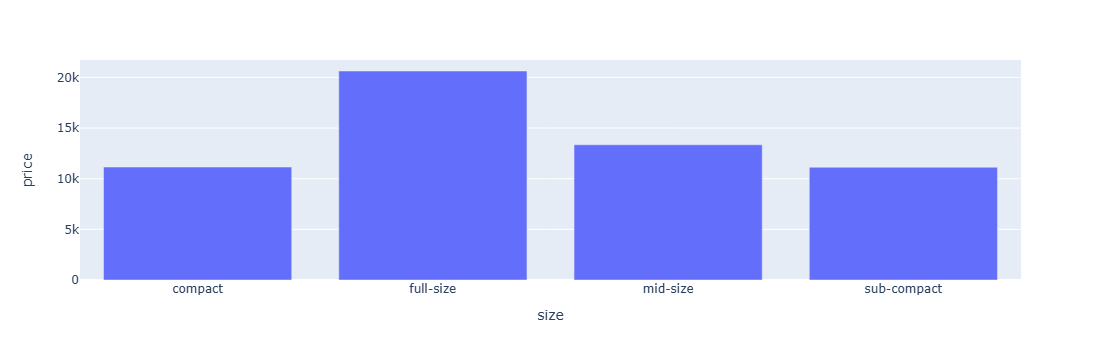

In [310]:
fig = px.bar(vals, x='size', y='price')
fig.show()

In [312]:
vals = vehicles.groupby(['cylinders'])[["price"]].mean()

In [314]:
vals = vals.reset_index()

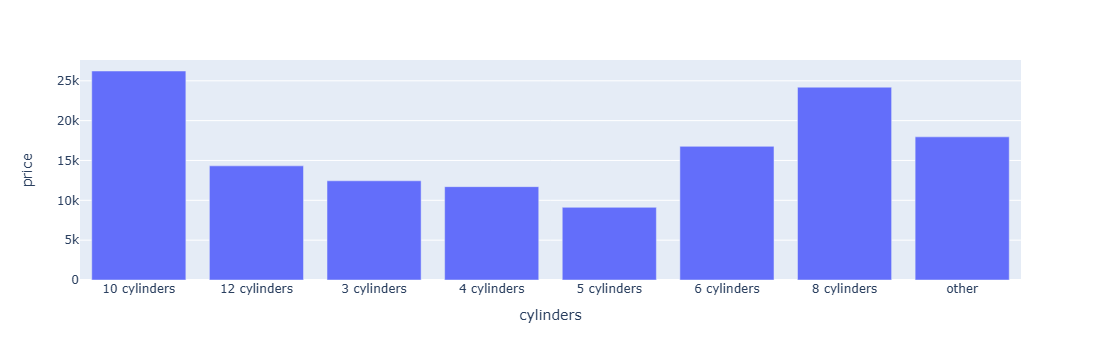

In [316]:
fig = px.bar(vals, x='cylinders', y='price')
fig.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [319]:
vehicle_pipeline_ridge = Pipeline([("col_transformer", col_transformer),('scale', StandardScaler()), ('rfe', RFE(Ridge(), n_features_to_select=4)), ('ridge', Ridge())])

In [321]:
param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}

In [323]:
grid_Kfold_ridge = GridSearchCV(vehicle_pipeline_ridge, param_grid=param_dict, cv = 5)

In [325]:
grid_Kfold_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['transmission',
                                                                          'fuel',
                                                                          'type']),
                                                                        ('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new']]),
                                                                         ['condition']),
                                                                        ('ordinalencoder-2',
                                                                         OrdinalEnc...
       7.90604321e+04, 1.26485522e+05, 2.02358965e+05, 3.23745754e+05,
       5.17947468e+05, 8.28642773e+05, 1.32571137e+06, 2.12095089e+06,
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10])})

In [326]:
test_preds_ridge = grid_Kfold_ridge.predict(X_train)

In [327]:
vehicle_pipeline_poly = Pipeline([("col_transformer", col_transformer),('poly_nomial',PolynomialFeatures(degree=2, include_bias= False)), ('linreg', LinearRegression())])

In [328]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_train,y_train,test_size = 0.3, random_state = 22)

In [329]:
vehicle_pipeline_poly = vehicle_pipeline_poly.fit(X_train_poly, y_train_poly)

In [330]:
train_preds_poly = vehicle_pipeline_poly.predict(X_train_poly)
test_preds_poly = vehicle_pipeline_poly.predict(X_test_poly)

In [331]:
lasso_params = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [346]:
vehicle_pipeline_lasso = Pipeline([("col_transformer", col_transformer),('scale', StandardScaler()), ('rfe', RFE(Lasso(), n_features_to_select=4)), ('lasso', Lasso())])

In [347]:
grid_Kfold_lasso = GridSearchCV(vehicle_pipeline_lasso, param_grid=lasso_params, cv = 5)

In [348]:
grid_Kfold_lasso = grid_Kfold_lasso.fit(X_train, y_train)

C:\Users\kwb33\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+09, tolerance: 4.354e+08

C:\Users\kwb33\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+09, tolerance: 4.354e+08

C:\Users\kwb33\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+09, tolerance: 4.354e+08

C:\Users\kwb33\anaconda3\Lib\site-packages\sklearn\linear_model\_co

In [349]:
test_preds_lasso = grid_Kfold_lasso.predict(X_train)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [354]:
kfold_mse_ridge = mean_squared_error(y_train, test_preds_ridge)
model_2_best_alpha = grid_Kfold_ridge.best_params_

print("kfold Ridge: "+ str(kfold_mse_ridge))
print("Best Alpha: "+ str(model_2_best_alpha))

kfold Ridge: 96042733.54166831
Best Alpha: {'ridge__alpha': 7543.120063354622}


In [356]:
r = permutation_importance(grid_Kfold_ridge, X_train, y_train,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<7} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

cylinders 0.214 +/- 0.003
fuel    0.209 +/- 0.003
year    0.187 +/- 0.002
odometer 0.089 +/- 0.002


In [358]:
kfold_mse_poly = mean_squared_error(y_test_poly, test_preds_poly)
print("Polynomial MSE: "+ str(kfold_mse_poly))

Polynomial MSE: 63221168.953619175


In [360]:
r = permutation_importance(vehicle_pipeline_poly, X_train_poly, y_train_poly,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<7} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    0.766 +/- 0.065
odometer 0.456 +/- 0.168
type    0.436 +/- 0.036
fuel    0.300 +/- 0.029
cylinders 0.214 +/- 0.012
transmission 0.075 +/- 0.016
condition 0.060 +/- 0.016
size    0.035 +/- 0.005


In [361]:
kfold_mse_lasso = mean_squared_error(y_train, test_preds_lasso)
model_2_best_alpha = grid_Kfold_lasso.best_params_

print("kfold Lasso: "+ str(kfold_mse_lasso))
print("Best Alpha: "+ str(model_2_best_alpha))

kfold Lasso: 93529221.55755451
Best Alpha: {'lasso__alpha': 100}


In [362]:
r = permutation_importance(grid_Kfold_lasso, X_train, y_train,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<7} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

cylinders 0.261 +/- 0.004
fuel    0.234 +/- 0.003
year    0.228 +/- 0.003
odometer 0.102 +/- 0.002


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [364]:
model_results = {
    'Model Name' : ['Lasso', 'Ridge', 'Polynomial'],
    'MSE' : [kfold_mse_lasso, kfold_mse_ridge, kfold_mse_poly]
}
 
# creating a Dataframe object 
results = pd.DataFrame(model_results)

In [365]:
results

,Model Name,MSE
0,Lasso,9.352922e+07
1,Ridge,9.604273e+07
2,Polynomial,6.322117e+07


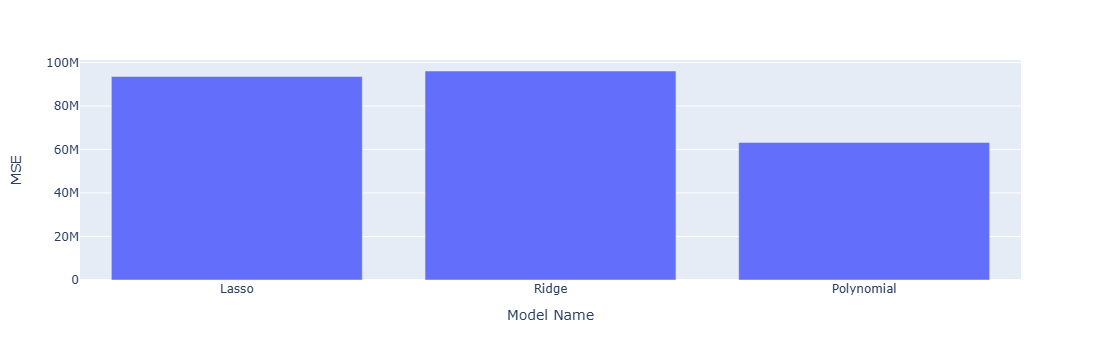

In [368]:
fig = px.bar(results, x='Model Name', y='MSE')
fig.show()